In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import roc_curve
from  sklearn import linear_model
from  sklearn.svm import SVC
pd.options.display.max_columns= None
pd.options.display.max_rows= None
np.set_printoptions(suppress=True)
plt.rcParams['figure.figsize']=[15,8]
pd.set_option("display.float_format", lambda x: "%.6f" %x)

In [2]:
deposit= pd.read_csv(r"D:\ml\svm\bank-additional-full.csv" ,sep=";")
deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [3]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
print(deposit.shape)

(41188, 21)


In [5]:
print("total people:{}" .format(deposit.shape[0]))
print("yes:{}".format(deposit[deposit.y=="yes"].shape[0]))
print("no:{}".format(deposit[deposit.y=="no"].shape[0]))

total people:41188
yes:4640
no:36548


In [6]:
deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
deposit.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
deposit["y"]= deposit['y'].replace('no',0)
deposit['y']= deposit['y'].replace('yes',1)
deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


In [9]:
categ=[col for col in deposit.columns.values if deposit[col].dtype=="object"]
data_cat = deposit[categ]
data_num = deposit.drop(categ , axis=1)

In [10]:
data_catdum= pd.get_dummies(data_cat,drop_first=True)


In [11]:
deposit=pd.concat([data_num, data_catdum],axis=1)
deposit.shape

(41188, 54)

In [12]:
missing = deposit.isnull().sum()
print(missing)

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

In [13]:
data_num=data_num.drop('y',axis=1)
corr= data_num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


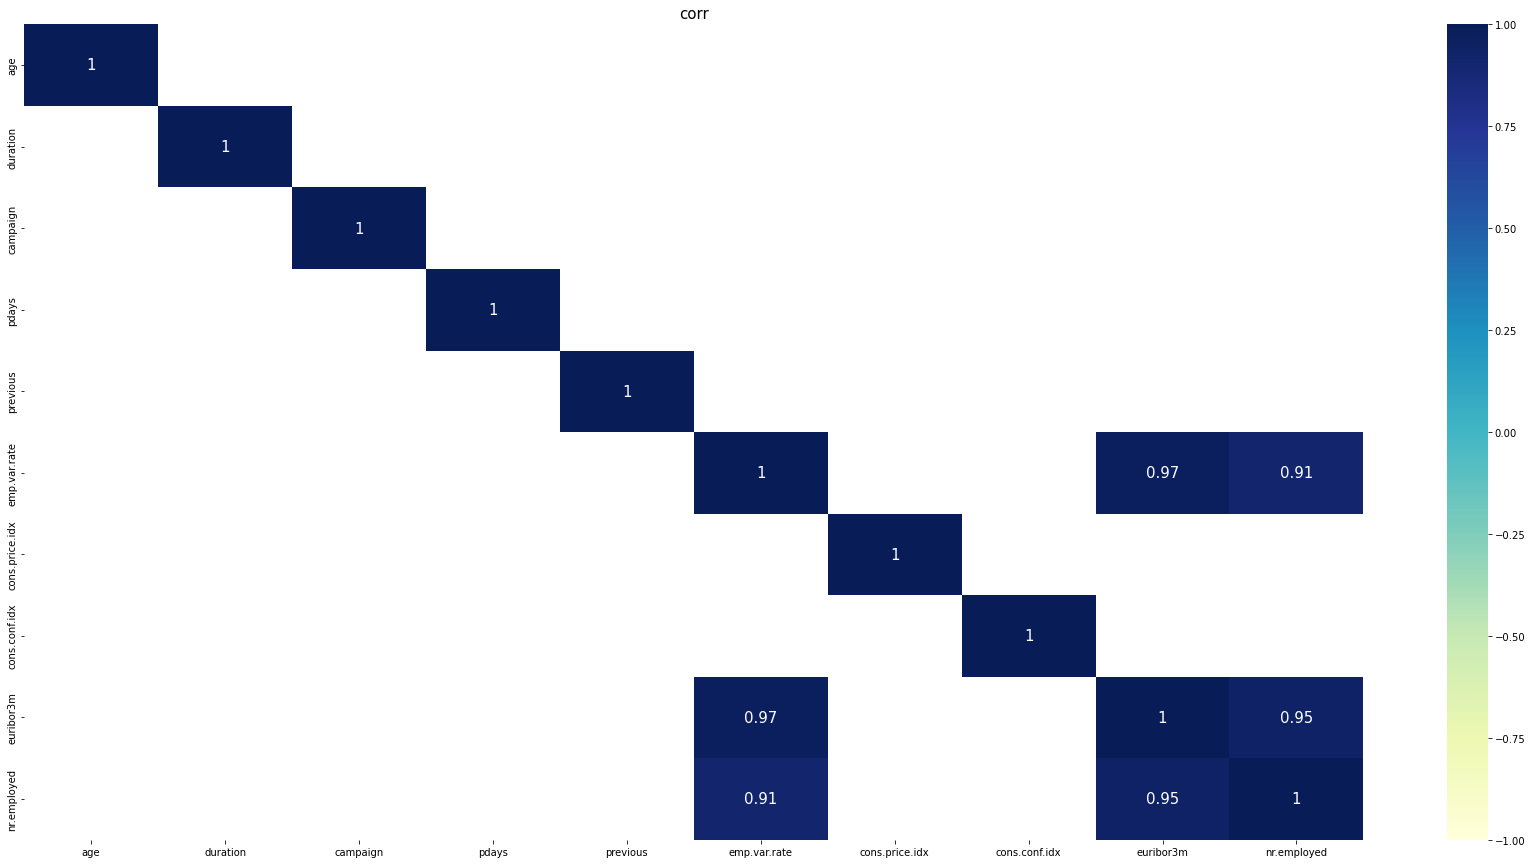

In [14]:
plt.figure(figsize=(30,15))
sns.heatmap(corr[(corr>=0.9)|(corr <=-0.9)],
           cmap="YlGnBu", vmax=1.0, vmin=-1.0,
           annot=True, annot_kws={'size':15})
plt.title('corr',fontsize=15)
plt.show()

In [15]:
deposit.drop(['euribor3m','emp.var.rate','nr.employed'], axis=1 ,inplace=True)

In [16]:
deposit.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [17]:
deposit.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994000,-36.400000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994000,-36.400000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994000,-36.400000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994000,-36.400000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994000,-36.400000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [18]:
x=deposit.iloc[:, deposit.columns != 'y']
y=deposit.iloc[:, deposit.columns == 'y']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=10)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (28831, 50)
x_test (12357, 50)
y_train (28831, 1)
y_test (12357, 1)


In [20]:
svs=SVC(kernel="linear")
svs.fit(x_train,y_train)

C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [21]:
y_pred=svs.predict(x_test)

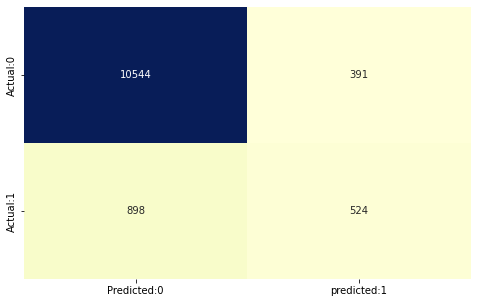

In [22]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [23]:
result= classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10935
           1       0.57      0.37      0.45      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.67      0.70     12357
weighted avg       0.88      0.90      0.89     12357



In [24]:
kappa= metrics.cohen_kappa_score(y_test,y_pred)
print('kappa value:',kappa)

kappa value: 0.3938140014885799


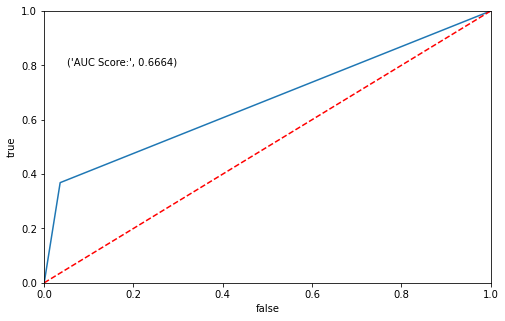

In [25]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [26]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','kappa scor','f1-score']
result_tabulation = pd.DataFrame(columns = cols)
SVM_linear_metrics = pd.Series({'Model': "svs",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'kappa scor':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})
result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)
result_tabulation

C:\Users\SAYYA\AppData\Local\Temp\ipykernel_308\1906204403.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,kappa scor,f1-score
0,svs,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438


In [27]:
svs=SVC(kernel="rbf")
svs.fit(x_train,y_train)

C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
y_pred_gus=svs.predict(x_test)

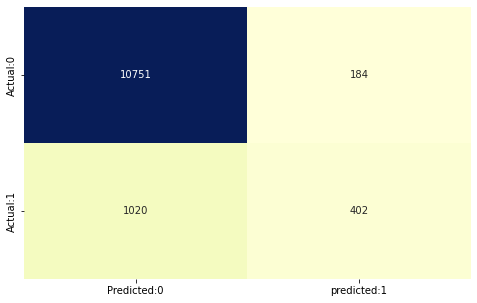

In [29]:
cm = confusion_matrix(y_test,y_pred_gus)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [30]:
result= classification_report(y_test,y_pred_gus)
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10935
           1       0.69      0.28      0.40      1422

    accuracy                           0.90     12357
   macro avg       0.80      0.63      0.67     12357
weighted avg       0.89      0.90      0.88     12357



In [31]:
kappa= metrics.cohen_kappa_score(y_test,y_pred_gus)
print('kappa value:',kappa)

kappa value: 0.3572257338028345


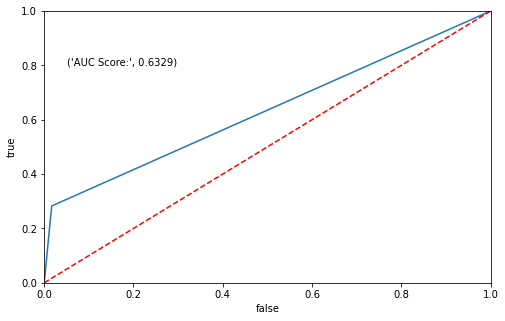

In [32]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,y_pred_gus)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred_gus),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [33]:

SVM_gus = pd.Series({'Model': "svs_gus",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gus),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gus),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gus),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gus),
                 'kappa scor':metrics.cohen_kappa_score(y_test, y_pred_gus),
                  'f1-score':metrics.f1_score(y_test, y_pred_gus)})
result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)
result_tabulation

C:\Users\SAYYA\AppData\Local\Temp\ipykernel_308\1203498064.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,kappa scor,f1-score
0,svs,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,svs_gus,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398


In [34]:
svs=SVC(kernel="sigmoid")
svs.fit(x_train,y_train)

C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [35]:
y_pred_sig=svs.predict(x_test)

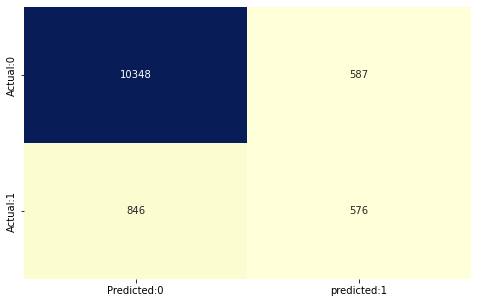

In [36]:
cm = confusion_matrix(y_test,y_pred_sig)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [37]:
result= classification_report(y_test,y_pred_sig)
print(result)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10935
           1       0.50      0.41      0.45      1422

    accuracy                           0.88     12357
   macro avg       0.71      0.68      0.69     12357
weighted avg       0.88      0.88      0.88     12357



In [38]:
kappa= metrics.cohen_kappa_score(y_test,y_pred_sig)
print('kappa value:',kappa)

kappa value: 0.3816164769932523


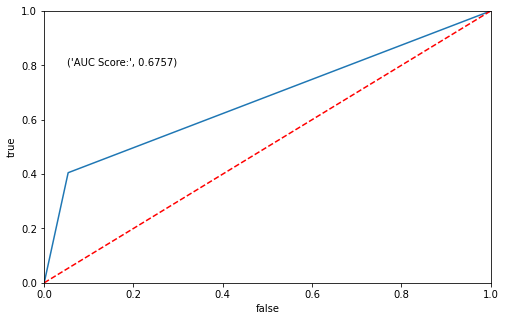

In [39]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,y_pred_sig)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred_sig),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [40]:

SVM_gus = pd.Series({'Model': "svs_sig",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_sig),
                 'Precision Score': metrics.precision_score(y_test, y_pred_sig),
                 'Recall Score': metrics.recall_score(y_test, y_pred_sig),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_sig),
                 'kappa scor':metrics.cohen_kappa_score(y_test, y_pred_sig),
                  'f1-score':metrics.f1_score(y_test, y_pred_sig)})
result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)
result_tabulation

C:\Users\SAYYA\AppData\Local\Temp\ipykernel_308\347613068.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,kappa scor,f1-score
0,svs,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,svs_gus,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398
2,svs_sig,0.675691,0.495271,0.405063,0.884033,0.381616,0.445648


In [41]:
svs=SVC(kernel="poly")
svs.fit(x_train,y_train)

C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [42]:
y_pred_pol=svs.predict(x_test)

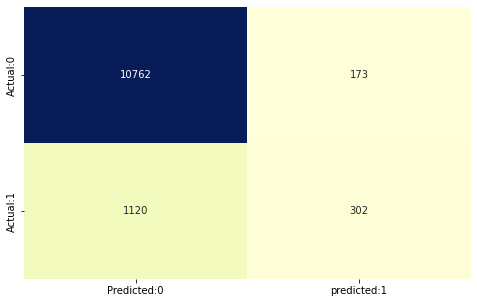

In [43]:
cm = confusion_matrix(y_test,y_pred_pol)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [44]:
result= classification_report(y_test,y_pred_pol)
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [45]:
kappa= metrics.cohen_kappa_score(y_test,y_pred_pol)
print('kappa value:',kappa)

kappa value: 0.27671511818588124


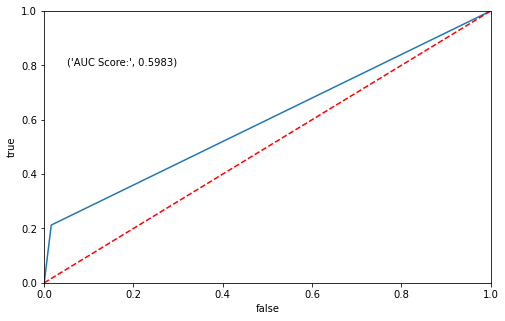

In [46]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,y_pred_pol)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred_pol),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [47]:

SVM_gus = pd.Series({'Model': "svs_pol",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_pol),
                 'Precision Score': metrics.precision_score(y_test, y_pred_pol),
                 'Recall Score': metrics.recall_score(y_test, y_pred_pol),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_pol),
                 'kappa scor':metrics.cohen_kappa_score(y_test, y_pred_pol),
                  'f1-score':metrics.f1_score(y_test, y_pred_pol)})
result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)
result_tabulation

C:\Users\SAYYA\AppData\Local\Temp\ipykernel_308\4098926608.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,kappa scor,f1-score
0,svs,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,svs_gus,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398
2,svs_sig,0.675691,0.495271,0.405063,0.884033,0.381616,0.445648
3,svs_pol,0.598278,0.635789,0.212377,0.895363,0.276715,0.318397


In [48]:
svs_poly=SVC(kernel="poly" , degree=2 ,gamma="auto")
svs_poly.fit(x_train,y_train)

C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=2, gamma='auto', kernel='poly')

In [49]:
y_pred_polyd=svs.predict(x_test)

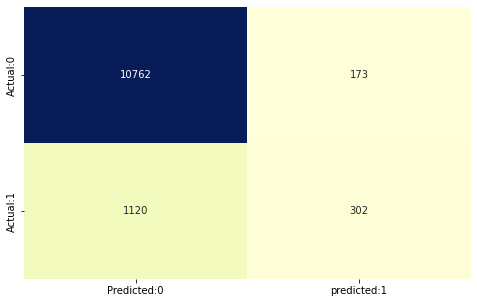

In [50]:
cm = confusion_matrix(y_test,y_pred_polyd)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [51]:
result= classification_report(y_test,y_pred_polyd)
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [52]:
kappa= metrics.cohen_kappa_score(y_test,y_pred_polyd)
print('kappa value:',kappa)

kappa value: 0.27671511818588124


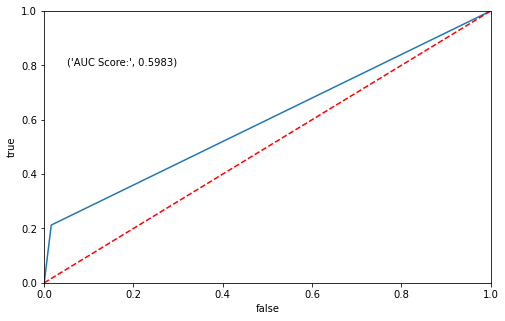

In [53]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,y_pred_polyd)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,y_pred_polyd),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [54]:
SVM_gus = pd.Series({'Model': "svs_pold",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_polyd),
                 'Precision Score': metrics.precision_score(y_test, y_pred_polyd),
                 'Recall Score': metrics.recall_score(y_test, y_pred_polyd),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_polyd),
                 'kappa scor':metrics.cohen_kappa_score(y_test, y_pred_polyd),
                  'f1-score':metrics.f1_score(y_test, y_pred_polyd)})
result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)
result_tabulation

C:\Users\SAYYA\AppData\Local\Temp\ipykernel_308\2635927914.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,kappa scor,f1-score
0,svs,0.666369,0.572678,0.368495,0.895687,0.393814,0.448438
1,svs_gus,0.632937,0.686007,0.282700,0.902565,0.357226,0.400398
2,svs_sig,0.675691,0.495271,0.405063,0.884033,0.381616,0.445648
3,svs_pol,0.598278,0.635789,0.212377,0.895363,0.276715,0.318397
4,svs_pold,0.598278,0.635789,0.212377,0.895363,0.276715,0.318397


In [55]:
param_grid={
    "degree":[2,4],
    "gamma":['auto','scale'],
    "C":[0.5,1]
}

In [ ]:
cv_rfc=GridSearchCV(estimator=svs_poly,param_grid=param_grid,scoring='accuracy',cv=5)
cv_rfc.fit(x_train,y_train)


C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAYYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
cv_rfc.best_params_

In [ ]:
svcbest=SVC(kernal='ploy',degree=2, gamma='auto',C=1)
svcbest.fit(x_train,y_train)

In [ ]:
ypr= svcbest.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,ypr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0',"predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize =(8,5))
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap="YlGnBu",cbar=False)
plt.show()

In [ ]:
result= classification_report(y_test,ypr)
print(result)

In [ ]:
kappa= metrics.cohen_kappa_score(y_test,ypr)
print('kappa value:',kappa)

In [ ]:
plt.rcParams['figure.figsize']=(8,5)
fpr ,tpr,thresholds = roc_curve(y_test,ypr)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8 , s=('AUC Score:', round(metrics.roc_auc_score(y_test,ypr),4)))
plt.xlabel('false')
plt.ylabel("true")
plt.show()

In [ ]:
SVM_gus = pd.Series({'Model': "svs_pold_grid",
                     'AUC Score' : metrics.roc_auc_score(y_test, ypr),
                 'Precision Score': metrics.precision_score(y_test, ypr),
                 'Recall Score': metrics.recall_score(y_test, ypr),
                 'Accuracy Score': metrics.accuracy_score(y_test, ypr),
                 'kappa scor':metrics.cohen_kappa_score(y_test, ypr),
                  'f1-score':metrics.f1_score(y_test, ypr)})
result_tabulation = result_tabulation.append(SVM_gus , ignore_index = True)
result_tabulation